Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

### Analysis
This assignment frankly didn't make too much sense to me, as I found it very difficult to actually find patterns in the contingency tables (I think that's what they're called?) that were given in the lesson as the primary way to evaluate the K-Means results.  _However_, once I'd read ahead and learned about Adjusted Rand Indeces, then I started getting somewhere.

As you can see, the ARI score peaks at .0579 when k=4, and then goes downhill afterwards.  Mini-Batch k-means produces similar results, though it tops out at k=2, with a max value of .0581. (Note that this is with the Mini-Batch algorithm's random_state set at 42; it can produce higher results if left unspecified, though they require many runs to achieve.) 

In [134]:
#  Normal K-Means

2-k clusters ARI:0.04007320887224546
3-k clusters ARI:0.025354059771616026
4-k clusters ARI:0.05791090528734981
5-k clusters ARI:0.053263698805798565
6-k clusters ARI:0.03744165220881513
7-k clusters ARI:0.03720737014347011
8-k clusters ARI:0.024960156759535453
9-k clusters ARI:0.022963455902690704
10-k clusters ARI:0.023385382152968377
11-k clusters ARI:0.024117869882907796
12-k clusters ARI:0.02102957844803032
13-k clusters ARI:0.022308155588419407
14-k clusters ARI:0.01723035105717202
15-k clusters ARI:0.013031478398041748
16-k clusters ARI:0.014827214859750654
17-k clusters ARI:0.019279724161551236
18-k clusters ARI:0.014970795239004669
19-k clusters ARI:0.014609556904021903
20-k clusters ARI:0.016558059207162714


In [141]:
#  Mini-Batch K-Means

2-k clusters Mini-Batch ARI:0.058140634541631715
3-k clusters Mini-Batch ARI:0.023877483535122247
4-k clusters Mini-Batch ARI:0.04018413809702197
5-k clusters Mini-Batch ARI:0.04240258585605197
6-k clusters Mini-Batch ARI:0.03161704339712353
7-k clusters Mini-Batch ARI:0.028730776384545905
8-k clusters Mini-Batch ARI:0.029500532711282706
9-k clusters Mini-Batch ARI:0.03013382559251787
10-k clusters Mini-Batch ARI:0.018683445319979827
11-k clusters Mini-Batch ARI:0.027982481350843084
12-k clusters Mini-Batch ARI:0.02204867377967895
13-k clusters Mini-Batch ARI:0.020922993951222497
14-k clusters Mini-Batch ARI:0.02120262568345055
15-k clusters Mini-Batch ARI:0.017202269092731294
16-k clusters Mini-Batch ARI:0.017749344135929428
17-k clusters Mini-Batch ARI:0.02046933273222367
18-k clusters Mini-Batch ARI:0.017068627045592137
19-k clusters Mini-Batch ARI:0.01708580960553653
20-k clusters Mini-Batch ARI:0.018951931963118306


Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


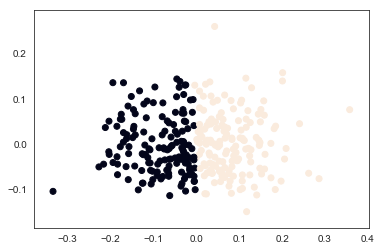

ARI: 0.04007320887224546


In [123]:
# 2-K clusters

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33


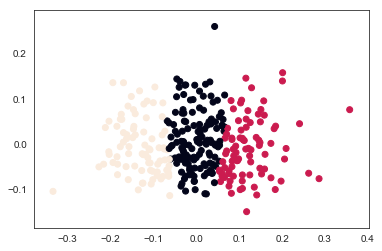

ARI: 0.025354059771616026


In [124]:
# 3-K clusters

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


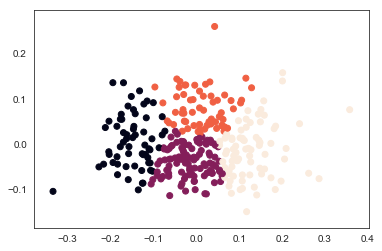

ARI: 0.05791090528734981


In [122]:
# 4-K clusters

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28


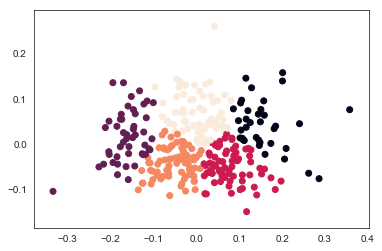

ARI: 0.053263698805798565


In [125]:
# 5-K clusters

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


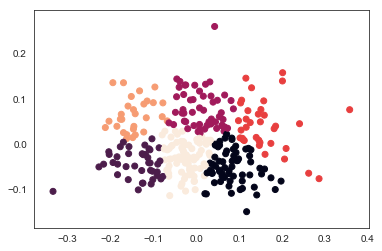

ARI: 0.03744165220881513


In [126]:
# 6-K clusters

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6


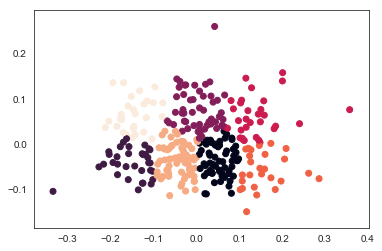

ARI: 0.03720737014347011


In [127]:
# 7-K clusters

## Importing code

In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from IPython.display import display

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split

from timeit import default_timer as timer

import os

import pydotplus
from sklearn import tree
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans


In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


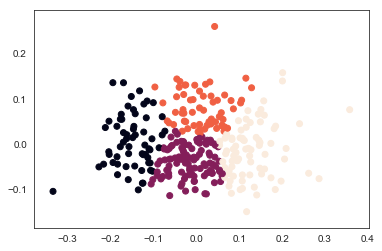

0.05791090528734981


In [128]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
#plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()
print(metrics.adjusted_rand_score(y, y_pred))


col_0   0   1
row_0        
0      38  22
1      40  23
2      38  68
3      23  51


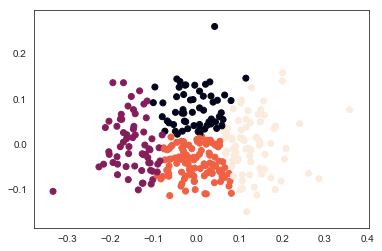

0.04018413809702197


In [139]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200,
    random_state=42)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

print(pd.crosstab(predict_mini, y))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
plt.show()
print(metrics.adjusted_rand_score(y, predict_mini))


In [134]:
for k in range(2,21):
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
    print(str(k) + 
          '-k clusters ARI:' + 
          str(metrics.adjusted_rand_score(y, y_pred)))

2-k clusters ARI:0.04007320887224546
3-k clusters ARI:0.025354059771616026
4-k clusters ARI:0.05791090528734981
5-k clusters ARI:0.053263698805798565
6-k clusters ARI:0.03744165220881513
7-k clusters ARI:0.03720737014347011
8-k clusters ARI:0.024960156759535453
9-k clusters ARI:0.022963455902690704
10-k clusters ARI:0.023385382152968377
11-k clusters ARI:0.024117869882907796
12-k clusters ARI:0.02102957844803032
13-k clusters ARI:0.022308155588419407
14-k clusters ARI:0.01723035105717202
15-k clusters ARI:0.013031478398041748
16-k clusters ARI:0.014827214859750654
17-k clusters ARI:0.019279724161551236
18-k clusters ARI:0.014970795239004669
19-k clusters ARI:0.014609556904021903
20-k clusters ARI:0.016558059207162714


In [140]:
for k in range(2,21):
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=k,
        batch_size=200,
        random_state=42)
    minibatchkmeans.fit(X_pca)
    predict_mini = minibatchkmeans.predict(X_pca)
    print(str(k) + 
          '-k clusters Mini-Batch ARI:' + 
          str(metrics.adjusted_rand_score(y, predict_mini)))

2-k clusters Mini-Batch ARI:0.058140634541631715
3-k clusters Mini-Batch ARI:0.023877483535122247
4-k clusters Mini-Batch ARI:0.04018413809702197
5-k clusters Mini-Batch ARI:0.04240258585605197
6-k clusters Mini-Batch ARI:0.03161704339712353
7-k clusters Mini-Batch ARI:0.028730776384545905
8-k clusters Mini-Batch ARI:0.029500532711282706
9-k clusters Mini-Batch ARI:0.03013382559251787
10-k clusters Mini-Batch ARI:0.018683445319979827
11-k clusters Mini-Batch ARI:0.027982481350843084
12-k clusters Mini-Batch ARI:0.02204867377967895
13-k clusters Mini-Batch ARI:0.020922993951222497
14-k clusters Mini-Batch ARI:0.02120262568345055
15-k clusters Mini-Batch ARI:0.017202269092731294
16-k clusters Mini-Batch ARI:0.017749344135929428
17-k clusters Mini-Batch ARI:0.02046933273222367
18-k clusters Mini-Batch ARI:0.017068627045592137
19-k clusters Mini-Batch ARI:0.01708580960553653
20-k clusters Mini-Batch ARI:0.018951931963118306
